<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#google_stt-:-transcribe_gcs(gcs_uri)" data-toc-modified-id="google_stt-:-transcribe_gcs(gcs_uri)-1">google_stt : transcribe_gcs(gcs_uri)</a></span></li><li><span><a href="#google_stt-:-transcribe_streaming(stream_file)" data-toc-modified-id="google_stt-:-transcribe_streaming(stream_file)-2">google_stt : transcribe_streaming(stream_file)</a></span></li><li><span><a href="#info_retrieval-:-tf-idf" data-toc-modified-id="info_retrieval-:-tf-idf-3">info_retrieval : tf-idf</a></span></li><li><span><a href="#Query" data-toc-modified-id="Query-4">Query</a></span></li><li><span><a href="#Wordcloud" data-toc-modified-id="Wordcloud-5">Wordcloud</a></span></li><li><span><a href="#K-Means-:-Clustering" data-toc-modified-id="K-Means-:-Clustering-6">K-Means : Clustering</a></span></li><li><span><a href="#LDA-:-topic-modeling-(with-gensim)" data-toc-modified-id="LDA-:-topic-modeling-(with-gensim)-7">LDA : topic modeling (with gensim)</a></span></li><li><span><a href="#Sentiment-Analysis" data-toc-modified-id="Sentiment-Analysis-8">Sentiment Analysis</a></span></li></ul></div>

In [1]:
import csv
import pyaudio
import wave

from nltk.tokenize import sent_tokenize, word_tokenize
from modules.google_stt import transcribe_gcs, transcribe_streaming, write_wave_frames

import scipy

### google_stt : transcribe_gcs(gcs_uri)

In [13]:
FILE_NAME = "bong_interview_YTN_16000"
gcs_uri = "gs://voice_magic_audio/" + FILE_NAME + ".wav"
words_with_tags, transcripts = transcribe_gcs(gcs_uri)

Waiting for operation to complete...
Transcript: 출장을 또 고생했지만 아직 팀장과의 면담은 남아있는 상태지만 이번에 깜찍 성에 대해서 좀 소개를 해 주죠네. 한국영화가 100주년을 기념하는 해인데요. 올해가 겹경사를 맞았어요. 우리나라 영화 중에 유일하게 칸 영화제 경쟁부문에 진출한 영화 기생충이 최고상인 황금종려상을 받은 건데요. 그 역사적인 현장에 있었기 때문에 현장 분위기와 함께 보고들은 것 좀 낱낱이 설명해 드리려고 합니다. 시상식대상 성을 해 달라는 요청을 받았기 때문에 약간 기대하는 분위기가 있었을 것 같은데 어땠어요? 시상식에 참석해 달라는 말이 곧 다시 꺼내 들었다라는 말과 똑같거든요. 칸영화제에서는 이게 우리나라의 같은 경우는 시상식에 참석한다고 해서 모든 이들에게 상을주지 많잖아요네 칸 영화제는 시험 시계 좀 참석해 달라 이렇게 얘기를 하면 나도 하나 받겠구나.

Transcript: 기대를 해도 되는 그런 또 독특한 점은 관례가 있어요. 송강호 씨한테 제가 직접 들어보니까 정오부터 1시 사이에 연락이 온다고 하는데 12시 41분 쯤에 연락이 없다고 해요. 40분 동안이 본인에게 굉장히 피말리는 순간이었다. 이렇게 얘기해도 했었고요. 그렇기 때문에 일단 그렇게 알고 나서는 어떤 이제 상을 받을 것인가? 그거에 대해서 좀 많이 이제 기자들도 그렇고 많이 집중을 하게 되었던 거 같아요. 황금종려상으로 사실을 뽑힐 거라고 예상을 했었나요? 지난 21일 리미 에르 극장에서 처음으로 배를 벗었는데 당시부터 좀 심상치 않게는 사실 했습니다. 상영 중에 이례적으로 개빡 3번 가는 박수갈채가 나왔었는데요. 그 어떤 장면에서 그렇게 영화 상영 중에 박스가방 왔죠. 전반적으로 보면 영화 1부와 2부로 나누어 좀게 중요한 거지. 분기점이 되는 장면이 있어요. 근데 좀 되게 돋보이는 그런 장면인데 그 장면을 끝나고 나자마자. 정말 궁금한데 직소를 박수가 터져 나오고.

Transcript: 네가 멍청한 것도 아닌데 상영 후에

In [14]:
corpus = ""
for transcript in transcripts:
        corpus += transcript + " "
# print(corpus)

In [15]:
sentence = sent_tokenize(corpus)    # 문장단위 분리
sentence

['출장을 또 고생했지만 아직 팀장과의 면담은 남아있는 상태지만 이번에 깜찍 성에 대해서 좀 소개를 해 주죠네.',
 '한국영화가 100주년을 기념하는 해인데요.',
 '올해가 겹경사를 맞았어요.',
 '우리나라 영화 중에 유일하게 칸 영화제 경쟁부문에 진출한 영화 기생충이 최고상인 황금종려상을 받은 건데요.',
 '그 역사적인 현장에 있었기 때문에 현장 분위기와 함께 보고들은 것 좀 낱낱이 설명해 드리려고 합니다.',
 '시상식대상 성을 해 달라는 요청을 받았기 때문에 약간 기대하는 분위기가 있었을 것 같은데 어땠어요?',
 '시상식에 참석해 달라는 말이 곧 다시 꺼내 들었다라는 말과 똑같거든요.',
 '칸영화제에서는 이게 우리나라의 같은 경우는 시상식에 참석한다고 해서 모든 이들에게 상을주지 많잖아요네 칸 영화제는 시험 시계 좀 참석해 달라 이렇게 얘기를 하면 나도 하나 받겠구나.',
 '기대를 해도 되는 그런 또 독특한 점은 관례가 있어요.',
 '송강호 씨한테 제가 직접 들어보니까 정오부터 1시 사이에 연락이 온다고 하는데 12시 41분 쯤에 연락이 없다고 해요.',
 '40분 동안이 본인에게 굉장히 피말리는 순간이었다.',
 '이렇게 얘기해도 했었고요.',
 '그렇기 때문에 일단 그렇게 알고 나서는 어떤 이제 상을 받을 것인가?',
 '그거에 대해서 좀 많이 이제 기자들도 그렇고 많이 집중을 하게 되었던 거 같아요.',
 '황금종려상으로 사실을 뽑힐 거라고 예상을 했었나요?',
 '지난 21일 리미 에르 극장에서 처음으로 배를 벗었는데 당시부터 좀 심상치 않게는 사실 했습니다.',
 '상영 중에 이례적으로 개빡 3번 가는 박수갈채가 나왔었는데요.',
 '그 어떤 장면에서 그렇게 영화 상영 중에 박스가방 왔죠.',
 '전반적으로 보면 영화 1부와 2부로 나누어 좀게 중요한 거지.',
 '분기점이 되는 장면이 있어요.',
 '근데 좀 되게 돋보이는 그런 장면인데 그 장면을 끝나고 나자마자.',
 '정말 궁금한데 직소를 박수가 터져 나오고.',
 '네가 멍

In [16]:
# 스크립트 만 Text 파일로 저장 (with newline)
text_file = "text/" + FILE_NAME + ".txt"
with open(text_file, 'w', encoding='utf-8') as f:
    for sent in sentence:
        f.write(sent + "\n")

In [17]:
words_array = [wt for wt in words_with_tags]
words_array

[['출장을', 0.0, 1.2, 0],
 ['또', 1.2, 1.5, 0],
 ['고생했지만', 1.5, 2.3, 0],
 ['아직', 2.3, 3.8, 0],
 ['팀장과의', 3.8, 4.4, 0],
 ['면담은', 4.4, 4.4, 0],
 ['남아있는', 4.4, 5.3, 0],
 ['상태지만', 5.3, 5.8, 0],
 ['이번에', 5.8, 10.2, 0],
 ['깜찍', 10.2, 10.7, 0],
 ['성에', 10.7, 10.9, 0],
 ['대해서', 10.9, 11.1, 0],
 ['좀', 11.1, 11.4, 0],
 ['소개를', 11.4, 12.5, 0],
 ['해', 12.5, 12.9, 0],
 ['주죠', 12.9, 13.1, 0],
 ['네', 13.1, 14.0, 0],
 ['한국영화가', 14.0, 15.8, 0],
 ['100주년을', 15.8, 17.4, 0],
 ['기념하는', 17.4, 17.8, 0],
 ['해인데요', 17.8, 18.6, 0],
 ['올해가', 18.6, 19.0, 0],
 ['겹경사를', 19.0, 20.2, 0],
 ['맞았어요', 20.2, 20.7, 0],
 ['우리나라', 20.7, 21.7, 0],
 ['영화', 21.7, 22.4, 0],
 ['중에', 22.4, 22.7, 0],
 ['유일하게', 22.7, 23.1, 0],
 ['칸', 23.1, 24.1, 0],
 ['영화제', 24.1, 24.4, 0],
 ['경쟁부문에', 24.4, 25.3, 0],
 ['진출한', 25.3, 25.9, 0],
 ['영화', 25.9, 26.4, 0],
 ['기생충이', 26.4, 27.1, 0],
 ['최고상인', 27.1, 27.9, 0],
 ['황금종려상을', 27.9, 29.0, 0],
 ['받은', 29.0, 29.4, 0],
 ['건데요', 29.4, 29.7, 0],
 ['그', 29.7, 30.3, 0],
 ['역사적인', 30.3, 31.0, 0],
 ['현장에', 31.0

In [18]:
# CSV 파일로 저장
csv_file = "text/" + FILE_NAME + ".csv"
with open(csv_file, 'w', encoding='utf-8', newline='') as f:
    wr = csv.writer(f)
    wr.writerow(["word", "start_time", "end_time", "speaker_tag"])
    for words in words_array:
        wr.writerow(words)

### google_stt : transcribe_streaming(stream_file)

In [2]:
# instantiate PyAudio
audio = pyaudio.PyAudio()

In [3]:
# open wave file
FILE_NAME = "witch_hunt_2_online-audio-converter.com_16000"
wf = wave.open("audio_file/"+ FILE_NAME + ".wav", 'rb')

In [4]:
# initialize variables
CHUNK = 1024   # 1024 bytes of data read from the buffer
FRAME_SIZE = CHUNK * 4
WAVE_OUTPUT_FILENAME = "wave_output.wav"    # temperary wave file for streaming 
FORMAT=audio.get_sample_size(wf.getsampwidth())
CHANNELS=wf.getnchannels()
RATE=wf.getframerate()
words_with_tags = []
transcripts_arr = []
frames = []
f_count = 0

In [5]:
# read data (first frames)
data = wf.readframes(CHUNK)

# transcribe stream  : wave file을 10M 이하로 잘라서, google STT API에 stream 방식으로 요청
while len(data) > 0:
    frames.append(data)
    f_count += 1
    if f_count == FRAME_SIZE:
        # write frames to wave file for frames
        write_wave_frames(frames, WAVE_OUTPUT_FILENAME, CHANNELS, FORMAT, RATE)
        
        # transcribe by streaming
        words_with_tag, transcripts = transcribe_streaming(WAVE_OUTPUT_FILENAME)    # frames를 직접 전달 시 google에서 grpc.RpcError 발생하면 cancel 됨 
        words_with_tags.append(words_with_tag)
        transcripts_arr.append(transcripts)
        
        # frame initialize
        frames = []
        f_count = 0
    
    # read data (continue)
    data = wf.readframes(CHUNK)

# transcribe for last frames
write_wave_frames(frames, WAVE_OUTPUT_FILENAME, CHANNELS, FORMAT, RATE)

# last frames
words_with_tag, transcripts = transcribe_streaming(WAVE_OUTPUT_FILENAME)
words_with_tags.append(words_with_tag)
transcripts_arr.append(transcripts)
print("transcribe complete!!!")

Waiting for transcribe...
Transcript: 근데 연예인 중에 저도 함께 많이 방송을 뭘 하게 될 일이 생기면 전전긍긍하고 제작장 댁에서 좀 빼 달라 나는 같이 지금 할 수가 끝까지 그런 거 조심하는 경우가 있고 어떤 분들은 또 천연덕스럽게 조는 괜찮고 훌륭하게 대처하는 분들도 계시더라구요. 예. 어때요? 함께 방송에 나와요. 뭐 예전에 잠깐 이렇게 사겼던 그럼 일반 사람인데 갑자기 반천계곡 예. 예 많이 힘들죠. 그냥 조그만 맞는구나 해서 헤어진 가벼운 관계는 우리 이모 친구는 계속 지내자. 근데 정말 막 축구 못 살고 막 그러다가 어쩔 수 없는 이유로 헤어졌으면 나중에 만나서 친구 잘 지내는가? 이렇게 되는 거 이상한 거 아닌가요? 잘 지내는가?

Transcript: 좋아했던 사람 자료 왔는가 보통 치료가 잘 안 되는 거예요. 그냥 쉽게 쉽게 만나는 스타일이 수도 있을 거 같아요. 근데 문제는이 여자가 딴 거를 못 해. 그렇지. 이런데 사 준다는 거야이 말을 할 때 얼마나 많은게 맞는 얘기고 못 찾는 얘기하며 방송용으로 창동역 역삼동 헤어졌어요. 상대방에게 다시 연락 온 적 있어. 혹시 없어요? 미친 거 같아. 다음에 술 마시고 전화한 거야. 그래서 막 약속할 수 없는 말들을 자꾸 문자로 보내는 거예요. 다음날 되면 또 필요하거든. 당연히 병원에 있어요. 좀 받아 본 적이 있죠 있어요. 지금 어디야? 왜 보고 싶어서

Transcript: 여보세요. 마이크가 어디야? 뉘앙스가 그냥 지금 만나서 오늘 같이 있자. 뭐 이런 느낌이었어요. 아니, 그렇게 만나서 회포를 푸순 있겠죠? 하룻밤 근데 없고 하루 지나고 난 술도 깨고 나면 사랑하지 못하는 그런 경우가 있지 않냐? 술취해서 전화한 거 그다음에 일어나는데 발신 열 두 번인데 0초 0초 0초 0초 0초 12분 이런 거 있잖아요. 참 술 먹었을 때 아침 일어나지마 주종 했던 거 핸드폰 확인했어요. 했나 누구한테 전화했는지 누구한테 문자 보냈는지 그리고 무슨 사진 찍은지 아니, 왜냐면 그

In [6]:
# close PyAudio
audio.terminate()

In [7]:
corpus = ""
for transcripts in transcripts_arr:
    for transcript in transcripts:
        corpus += transcript + " "

sentence = sent_tokenize(corpus)    # 문장단위 분리
sentence

['근데 연예인 중에 저도 함께 많이 방송을 뭘 하게 될 일이 생기면 전전긍긍하고 제작장 댁에서 좀 빼 달라 나는 같이 지금 할 수가 끝까지 그런 거 조심하는 경우가 있고 어떤 분들은 또 천연덕스럽게 조는 괜찮고 훌륭하게 대처하는 분들도 계시더라구요.',
 '예.',
 '어때요?',
 '함께 방송에 나와요.',
 '뭐 예전에 잠깐 이렇게 사겼던 그럼 일반 사람인데 갑자기 반천계곡 예.',
 '예 많이 힘들죠.',
 '그냥 조그만 맞는구나 해서 헤어진 가벼운 관계는 우리 이모 친구는 계속 지내자.',
 '근데 정말 막 축구 못 살고 막 그러다가 어쩔 수 없는 이유로 헤어졌으면 나중에 만나서 친구 잘 지내는가?',
 '이렇게 되는 거 이상한 거 아닌가요?',
 '잘 지내는가?',
 '좋아했던 사람 자료 왔는가 보통 치료가 잘 안 되는 거예요.',
 '그냥 쉽게 쉽게 만나는 스타일이 수도 있을 거 같아요.',
 '근데 문제는이 여자가 딴 거를 못 해.',
 '그렇지.',
 '이런데 사 준다는 거야이 말을 할 때 얼마나 많은게 맞는 얘기고 못 찾는 얘기하며 방송용으로 창동역 역삼동 헤어졌어요.',
 '상대방에게 다시 연락 온 적 있어.',
 '혹시 없어요?',
 '미친 거 같아.',
 '다음에 술 마시고 전화한 거야.',
 '그래서 막 약속할 수 없는 말들을 자꾸 문자로 보내는 거예요.',
 '다음날 되면 또 필요하거든.',
 '당연히 병원에 있어요.',
 '좀 받아 본 적이 있죠 있어요.',
 '지금 어디야?',
 '왜 보고 싶어서 여보세요.',
 '마이크가 어디야?',
 '뉘앙스가 그냥 지금 만나서 오늘 같이 있자.',
 '뭐 이런 느낌이었어요.',
 '아니, 그렇게 만나서 회포를 푸순 있겠죠?',
 '하룻밤 근데 없고 하루 지나고 난 술도 깨고 나면 사랑하지 못하는 그런 경우가 있지 않냐?',
 '술취해서 전화한 거 그다음에 일어나는데 발신 열 두 번인데 0초 0초 0초 0초 0초 12분 이런 거 있잖아요.',
 '참 술 먹었을 때 아침 일어나지마 주종 했던 거

In [8]:
# 스크립트 만 Text 파일로 저장 (with newline)
text_file = "text/" + FILE_NAME + ".txt"
with open(text_file, 'w', encoding='utf-8') as f:
    for sent in sentence:
        f.write(sent + "\n")

In [9]:
words_array = [wt for wts in words_with_tags for wt in wts]
words_array

[['근데', 0.0, 0.3, 1],
 ['연예인', 0.3, 0.8, 1],
 ['중에', 0.8, 1.0, 1],
 ['저도', 1.0, 1.4, 1],
 ['함께', 1.4, 2.1, 1],
 ['많이', 2.1, 2.3, 1],
 ['방송을', 2.3, 2.9, 1],
 ['뭘', 2.9, 3.2, 1],
 ['하게', 3.2, 3.4, 1],
 ['될', 3.4, 3.6, 1],
 ['일이', 3.6, 4.5, 1],
 ['생기면', 4.5, 4.8, 1],
 ['전전긍긍하고', 4.8, 7.2, 1],
 ['제작장', 7.2, 8.2, 1],
 ['댁에서', 8.2, 8.6, 1],
 ['좀', 8.6, 9.5, 1],
 ['빼', 9.5, 9.6, 1],
 ['달라', 9.6, 9.9, 1],
 ['나는', 9.9, 10.8, 1],
 ['같이', 10.8, 11.0, 1],
 ['지금', 11.0, 11.3, 1],
 ['할', 11.3, 11.7, 1],
 ['수가', 11.7, 11.9, 1],
 ['끝까지', 11.9, 12.9, 1],
 ['그런', 12.9, 13.1, 1],
 ['거', 13.1, 13.1, 1],
 ['조심하는', 13.1, 13.6, 1],
 ['경우가', 13.6, 13.8, 1],
 ['있고', 13.8, 14.0, 1],
 ['어떤', 14.0, 14.4, 1],
 ['분들은', 14.4, 15.7, 1],
 ['또', 15.7, 15.8, 1],
 ['천연덕스럽게', 15.8, 17.6, 1],
 ['조는', 17.6, 18.4, 1],
 ['괜찮고', 18.4, 19.1, 1],
 ['훌륭하게', 19.1, 20.5, 1],
 ['대처하는', 20.5, 21.2, 1],
 ['분들도', 21.2, 21.7, 1],
 ['계시더라구요.', 21.7, 22.2, 1],
 ['예.', 22.2, 24.5, 1],
 ['어때요?', 24.5, 25.3, 1],
 ['함께', 25.3, 27.1, 1],
 ['방송

In [10]:
# CSV 파일로 저장
csv_file = "text/" + FILE_NAME + ".csv"
with open(csv_file, 'w', encoding='utf-8', newline='') as f:
    wr = csv.writer(f)
    wr.writerow(["word", "start_time", "end_time", "speaker_tag"])
    for words in words_array:
        wr.writerow(words)

### info_retrieval : tf-idf

In [11]:
from modules import info_retrieval as ir
from modules.info_retrieval import clean_collection
from modules.info_retrieval import get_extended_lexicon
from modules.info_retrieval import inverted_index_with_tf
from modules.info_retrieval import get_tdm_from_dtm
from modules.info_retrieval import tdm2twm
from modules.info_retrieval import evaluate_idf

In [12]:
import numpy as np
import pandas as pd

In [13]:
collection = []
for idx, sent in enumerate(sentence):
    collection.append(["paragraph"+str(idx), sent])

In [14]:
collection

[['paragraph0',
  '근데 연예인 중에 저도 함께 많이 방송을 뭘 하게 될 일이 생기면 전전긍긍하고 제작장 댁에서 좀 빼 달라 나는 같이 지금 할 수가 끝까지 그런 거 조심하는 경우가 있고 어떤 분들은 또 천연덕스럽게 조는 괜찮고 훌륭하게 대처하는 분들도 계시더라구요.'],
 ['paragraph1', '예.'],
 ['paragraph2', '어때요?'],
 ['paragraph3', '함께 방송에 나와요.'],
 ['paragraph4', '뭐 예전에 잠깐 이렇게 사겼던 그럼 일반 사람인데 갑자기 반천계곡 예.'],
 ['paragraph5', '예 많이 힘들죠.'],
 ['paragraph6', '그냥 조그만 맞는구나 해서 헤어진 가벼운 관계는 우리 이모 친구는 계속 지내자.'],
 ['paragraph7', '근데 정말 막 축구 못 살고 막 그러다가 어쩔 수 없는 이유로 헤어졌으면 나중에 만나서 친구 잘 지내는가?'],
 ['paragraph8', '이렇게 되는 거 이상한 거 아닌가요?'],
 ['paragraph9', '잘 지내는가?'],
 ['paragraph10', '좋아했던 사람 자료 왔는가 보통 치료가 잘 안 되는 거예요.'],
 ['paragraph11', '그냥 쉽게 쉽게 만나는 스타일이 수도 있을 거 같아요.'],
 ['paragraph12', '근데 문제는이 여자가 딴 거를 못 해.'],
 ['paragraph13', '그렇지.'],
 ['paragraph14',
  '이런데 사 준다는 거야이 말을 할 때 얼마나 많은게 맞는 얘기고 못 찾는 얘기하며 방송용으로 창동역 역삼동 헤어졌어요.'],
 ['paragraph15', '상대방에게 다시 연락 온 적 있어.'],
 ['paragraph16', '혹시 없어요?'],
 ['paragraph17', '미친 거 같아.'],
 ['paragraph18', '다음에 술 마시고 전화한 거야.'],
 ['paragraph19', '그래서 막 약속할 수 없는 말들을 자꾸 문자로 보내는 거예

In [15]:
cleaned_collection = clean_collection(collection)
cleaned_collection

[['paragraph0',
  '근데 연예인 중에 저도 함께 많이 방송을 뭘 하게 될 일이 생기면 전전긍긍하고 제작장 댁에서 좀 빼 달라 나는 같이 지금 할 수가 끝까지 그런 거 조심하는 경우가 있고 어떤 분들은 또 천연덕스럽게 조는 괜찮고 훌륭하게 대처하는 분들도 계시더라구요 '],
 ['paragraph1', '예 '],
 ['paragraph2', '어때요 '],
 ['paragraph3', '함께 방송에 나와요 '],
 ['paragraph4', '뭐 예전에 잠깐 이렇게 사겼던 그럼 일반 사람인데 갑자기 반천계곡 예 '],
 ['paragraph5', '예 많이 힘들죠 '],
 ['paragraph6', '그냥 조그만 맞는구나 해서 헤어진 가벼운 관계는 우리 이모 친구는 계속 지내자 '],
 ['paragraph7', '근데 정말 막 축구 못 살고 막 그러다가 어쩔 수 없는 이유로 헤어졌으면 나중에 만나서 친구 잘 지내는가 '],
 ['paragraph8', '이렇게 되는 거 이상한 거 아닌가요 '],
 ['paragraph9', '잘 지내는가 '],
 ['paragraph10', '좋아했던 사람 자료 왔는가 보통 치료가 잘 안 되는 거예요 '],
 ['paragraph11', '그냥 쉽게 쉽게 만나는 스타일이 수도 있을 거 같아요 '],
 ['paragraph12', '근데 문제는이 여자가 딴 거를 못 해 '],
 ['paragraph13', '그렇지 '],
 ['paragraph14',
  '이런데 사 준다는 거야이 말을 할 때 얼마나 많은게 맞는 얘기고 못 찾는 얘기하며 방송용으로 창동역 역삼동 헤어졌어요 '],
 ['paragraph15', '상대방에게 다시 연락 온 적 있어 '],
 ['paragraph16', '혹시 없어요 '],
 ['paragraph17', '미친 거 같아 '],
 ['paragraph18', '다음에 술 마시고 전화한 거야 '],
 ['paragraph19', '그래서 막 약속할 수 없는 말들을 자꾸 문자로 보내는 거예

In [16]:
extended_collection = []

for idx, (paragraph, corpus) in enumerate(cleaned_collection):
    extended_lexicon = get_extended_lexicon(corpus, nouns=False, stopwords=True)
    if len(extended_lexicon) > 0:
        extended_collection.append([paragraph, list(extended_lexicon)])

In [17]:
extended_collection

[['paragraph0',
  ['근데',
   '연예인',
   '중에',
   '저도',
   '함께',
   '많이',
   '방송을',
   '하게',
   '일이',
   '생기면',
   '전전긍긍하고',
   '제작장',
   '댁에서',
   '달라',
   '나는',
   '같이',
   '지금',
   '수가',
   '끝까지',
   '그런',
   '조심하는',
   '경우가',
   '있고',
   '어떤',
   '분들은',
   '천연덕스럽게',
   '조는',
   '괜찮고',
   '훌륭하게',
   '대처하는',
   '분들도',
   '계시더라구요',
   '근데',
   '연예인',
   '어도',
   '함께',
   '많이',
   '방송',
   '무엇',
   '생기',
   '전전긍긍',
   '제작',
   '에서',
   '달라',
   '같이',
   '지금',
   '수가',
   '까지',
   '그렇',
   '조심',
   '경우',
   '어떤',
   '천연덕스럽',
   '괜찮',
   '훌륭',
   '대처',
   '계시',
   '라구요',
   '근데',
   '연예',
   '예인',
   '중에',
   '저도',
   '함께',
   '많이',
   '방송',
   '송을',
   '하게',
   '일이',
   '생기',
   '기면',
   '전전',
   '전긍',
   '긍긍',
   '긍하',
   '하고',
   '제작',
   '작장',
   '댁에',
   '에서',
   '달라',
   '나는',
   '같이',
   '지금',
   '수가',
   '끝까',
   '까지',
   '그런',
   '조심',
   '심하',
   '하는',
   '경우',
   '우가',
   '있고',
   '어떤',
   '분들',
   '들은',
   '천연',
   '연덕',
   '덕스',
   '스럽',
   '럽게',
   '조는',
   '괜찮',
   '찮고',
   '

In [18]:
global_lexicon, global_posting, global_paragraph, dtm_dict = inverted_index_with_tf(extended_collection)

indexing 완료


In [19]:
print(global_lexicon)

{'근데': 2226, '연예인': 1, '중에': 2299, '저도': 3, '함께': 854, '많이': 2315, '방송을': 6, '하게': 2029, '일이': 1983, '생기면': 9, '전전긍긍하고': 10, '제작장': 11, '댁에서': 12, '달라': 13, '나는': 1799, '같이': 387, '지금': 2344, '수가': 1455, '끝까지': 18, '그런': 2331, '조심하는': 20, '경우가': 427, '있고': 22, '어떤': 1806, '분들은': 1757, '천연덕스럽게': 25, '조는': 26, '괜찮고': 27, '훌륭하게': 28, '대처하는': 29, '분들도': 30, '계시더라구요': 31, '어도': 32, '방송': 264, '무엇': 34, '생기': 35, '전전긍긍': 36, '제작': 37, '에서': 2504, '까지': 1056, '그렇': 2335, '조심': 833, '경우': 2181, '천연덕스럽': 43, '괜찮': 2449, '훌륭': 45, '대처': 46, '계시': 47, '라구요': 48, '연예': 49, '예인': 50, '송을': 51, '기면': 52, '전전': 53, '전긍': 54, '긍긍': 55, '긍하': 56, '하고': 2523, '작장': 58, '댁에': 59, '끝까': 60, '심하': 2014, '하는': 2375, '우가': 440, '분들': 1777, '들은': 2490, '천연': 66, '연덕': 67, '덕스': 68, '스럽': 1356, '럽게': 1364, '찮고': 71, '륭하': 72, '처하': 2479, '들도': 2485, '시더': 75, '더라': 1423, '라구': 77, '구요': 78, '어때요': 79, '어때': 80, '때요': 81, '방송에': 83, '나와요': 84, '나오': 2221, '아요': 2450, '송에': 88, '나와': 2137, '와요': 90, '예전에': 630, 

In [20]:
print(global_posting)

[[0, 0, 1.0, -1], [1, 0, 0.6666666666666666, -1], [2, 0, 0.6666666666666666, -1], [3, 0, 0.6666666666666666, -1], [4, 0, 1.0, -1], [5, 0, 1.0, -1], [6, 0, 0.3333333333333333, -1], [7, 0, 1.0, -1], [8, 0, 0.6666666666666666, -1], [9, 0, 0.3333333333333333, -1], [10, 0, 0.3333333333333333, -1], [11, 0, 0.3333333333333333, -1], [12, 0, 0.3333333333333333, -1], [13, 0, 1.0, -1], [14, 0, 0.6666666666666666, -1], [15, 0, 1.0, -1], [16, 0, 1.0, -1], [17, 0, 1.0, -1], [18, 0, 0.3333333333333333, -1], [19, 0, 0.6666666666666666, -1], [20, 0, 0.3333333333333333, -1], [21, 0, 0.3333333333333333, -1], [22, 0, 0.6666666666666666, -1], [23, 0, 1.0, -1], [24, 0, 0.3333333333333333, -1], [25, 0, 0.3333333333333333, -1], [26, 0, 0.6666666666666666, -1], [27, 0, 0.3333333333333333, -1], [28, 0, 0.3333333333333333, -1], [29, 0, 0.3333333333333333, -1], [30, 0, 0.3333333333333333, -1], [31, 0, 0.3333333333333333, -1], [32, 0, 0.3333333333333333, -1], [33, 0, 0.6666666666666666, -1], [34, 0, 0.333333333333

In [21]:
print(global_paragraph)

['paragraph0', 'paragraph2', 'paragraph3', 'paragraph4', 'paragraph5', 'paragraph6', 'paragraph7', 'paragraph8', 'paragraph9', 'paragraph10', 'paragraph11', 'paragraph12', 'paragraph13', 'paragraph14', 'paragraph15', 'paragraph16', 'paragraph17', 'paragraph18', 'paragraph19', 'paragraph20', 'paragraph21', 'paragraph22', 'paragraph23', 'paragraph24', 'paragraph25', 'paragraph26', 'paragraph27', 'paragraph28', 'paragraph29', 'paragraph30', 'paragraph31', 'paragraph32', 'paragraph33', 'paragraph34', 'paragraph36', 'paragraph37', 'paragraph38', 'paragraph39', 'paragraph40', 'paragraph41', 'paragraph42', 'paragraph43', 'paragraph44', 'paragraph45', 'paragraph46', 'paragraph47', 'paragraph48', 'paragraph49', 'paragraph50', 'paragraph51', 'paragraph52', 'paragraph53', 'paragraph54', 'paragraph55', 'paragraph56', 'paragraph57', 'paragraph58', 'paragraph59', 'paragraph60', 'paragraph61', 'paragraph62', 'paragraph63', 'paragraph64', 'paragraph65', 'paragraph66', 'paragraph67', 'paragraph68', 'pa

In [22]:
dtm_dict

{'paragraph0': defaultdict(int,
             {'근데': 3,
              '연예인': 2,
              '중에': 2,
              '저도': 2,
              '함께': 3,
              '많이': 3,
              '방송을': 1,
              '하게': 3,
              '일이': 2,
              '생기면': 1,
              '전전긍긍하고': 1,
              '제작장': 1,
              '댁에서': 1,
              '달라': 3,
              '나는': 2,
              '같이': 3,
              '지금': 3,
              '수가': 3,
              '끝까지': 1,
              '그런': 2,
              '조심하는': 1,
              '경우가': 1,
              '있고': 2,
              '어떤': 3,
              '분들은': 1,
              '천연덕스럽게': 1,
              '조는': 2,
              '괜찮고': 1,
              '훌륭하게': 1,
              '대처하는': 1,
              '분들도': 1,
              '계시더라구요': 1,
              '어도': 1,
              '방송': 2,
              '무엇': 1,
              '생기': 2,
              '전전긍긍': 1,
              '제작': 2,
              '에서': 2,
              '까지': 2,
              '그렇'

In [23]:
for index_term, posting_idx in global_lexicon.items():
    # index_term:단어, posting_idx:위치
    print(index_term)
    
    while True:    # Posting Nexting: -1
        if posting_idx == -1:
            break
            
        posting_data = global_posting[posting_idx]
        print("    {0}    /    TF:{1}    /    Next:{2}".format(global_paragraph[posting_data[1]], posting_data[2], posting_data[3]))
        posting_idx = posting_data[3]

근데
    paragraph133    /    TF:1.0    /    Next:2213
    paragraph131    /    TF:1.0    /    Next:2035
    paragraph120    /    TF:0.6666666666666666    /    Next:1450
    paragraph88    /    TF:1.0    /    Next:1377
    paragraph86    /    TF:0.6666666666666666    /    Next:1060
    paragraph71    /    TF:0.6666666666666666    /    Next:1042
    paragraph69    /    TF:0.6666666666666666    /    Next:1021
    paragraph66    /    TF:0.6666666666666666    /    Next:996
    paragraph65    /    TF:1.0    /    Next:741
    paragraph48    /    TF:1.0    /    Next:532
    paragraph33    /    TF:1.0    /    Next:417
    paragraph29    /    TF:1.0    /    Next:234
    paragraph12    /    TF:1.0    /    Next:151
    paragraph7    /    TF:0.6666666666666666    /    Next:0
    paragraph0    /    TF:1.0    /    Next:-1
연예인
    paragraph0    /    TF:0.6666666666666666    /    Next:-1
중에
    paragraph136    /    TF:0.3333333333333333    /    Next:179
    paragraph7    /    TF:0.3333333333333333    / 

후에
    paragraph66    /    TF:0.6666666666666666    /    Next:-1
진심으로
    paragraph66    /    TF:0.3333333333333333    /    Next:-1
생각해
    paragraph109    /    TF:0.16666666666666666    /    Next:1025
    paragraph66    /    TF:0.3333333333333333    /    Next:-1
볼게
    paragraph66    /    TF:0.6666666666666666    /    Next:-1
진심
    paragraph66    /    TF:0.6666666666666666    /    Next:-1
심으
    paragraph66    /    TF:0.3333333333333333    /    Next:-1
이러는
    paragraph73    /    TF:0.5    /    Next:1034
    paragraph67    /    TF:0.5    /    Next:-1
이러
    paragraph73    /    TF:1.0    /    Next:1036
    paragraph67    /    TF:1.0    /    Next:-1
러는
    paragraph73    /    TF:0.5    /    Next:1038
    paragraph67    /    TF:0.5    /    Next:-1
사귈
    paragraph69    /    TF:0.6666666666666666    /    Next:-1
있을까
    paragraph69    /    TF:0.3333333333333333    /    Next:-1
을까
    paragraph69    /    TF:0.6666666666666666    /    Next:-1
소리까지
    paragraph70    /    TF:0.3333333333333

In [24]:
tdm = get_tdm_from_dtm(dtm_dict)
tdm

{'근데': defaultdict(int,
             {'paragraph0': 3,
              'paragraph7': 2,
              'paragraph12': 3,
              'paragraph29': 3,
              'paragraph33': 3,
              'paragraph48': 3,
              'paragraph65': 3,
              'paragraph66': 2,
              'paragraph69': 2,
              'paragraph71': 2,
              'paragraph86': 2,
              'paragraph88': 3,
              'paragraph120': 2,
              'paragraph131': 3,
              'paragraph133': 3}),
 '연예인': defaultdict(int, {'paragraph0': 2}),
 '중에': defaultdict(int, {'paragraph0': 2, 'paragraph7': 1, 'paragraph136': 1}),
 '저도': defaultdict(int, {'paragraph0': 2}),
 '함께': defaultdict(int, {'paragraph0': 3, 'paragraph3': 3, 'paragraph55': 3}),
 '많이': defaultdict(int,
             {'paragraph0': 3,
              'paragraph5': 3,
              'paragraph45': 3,
              'paragraph92': 3,
              'paragraph137': 3}),
 '방송을': defaultdict(int, {'paragraph0': 1}),
 '하게': defaultd

In [25]:
twm, dvw = tdm2twm(tdm, global_paragraph)
twm

{'근데': defaultdict(float,
             {'paragraph0': 2.9377343352281415,
              'paragraph7': 1.958489556818761,
              'paragraph12': 2.9377343352281415,
              'paragraph29': 2.9377343352281415,
              'paragraph33': 2.9377343352281415,
              'paragraph48': 2.9377343352281415,
              'paragraph65': 2.9377343352281415,
              'paragraph66': 1.958489556818761,
              'paragraph69': 1.958489556818761,
              'paragraph71': 1.958489556818761,
              'paragraph86': 1.958489556818761,
              'paragraph88': 2.9377343352281415,
              'paragraph120': 1.958489556818761,
              'paragraph131': 2.9377343352281415,
              'paragraph133': 2.9377343352281415}),
 '연예인': defaultdict(float, {'paragraph0': 4.310672074930124}),
 '중에': defaultdict(float,
             {'paragraph0': 3.3564295654907985,
              'paragraph7': 1.6782147827453993,
              'paragraph136': 1.6782147827453993}),
 '저도'

In [26]:
dvw

{'paragraph0': defaultdict(float,
             {'근데': 8.63028302437833,
              '연예인': 18.581893737582377,
              '중에': 11.26561942810075,
              '저도': 18.581893737582377,
              '함께': 25.347643713226685,
              '많이': 19.08901820206822,
              '방송을': 4.645473434395594,
              '하게': 25.347643713226685,
              '일이': 11.26561942810075,
              '생기면': 4.645473434395594,
              '전전긍긍하고': 4.645473434395594,
              '제작장': 4.645473434395594,
              '댁에서': 4.645473434395594,
              '달라': 41.809260909560344,
              '나는': 8.4840080898081,
              '같이': 30.946058069939912,
              '지금': 14.11308153832971,
              '수가': 30.946058069939912,
              '끝까지': 4.645473434395594,
              '그런': 4.632436540362829,
              '조심하는': 4.645473434395594,
              '경우가': 3.4384508966599907,
              '있고': 18.581893737582377,
              '어떤': 21.7139982795297,
            

In [27]:
global_lexicon_idf, global_paragraph_weight = evaluate_idf(global_lexicon, global_posting, global_paragraph)

In [28]:
global_lexicon_idf

{'근데': 0.9792447784093805,
 '연예인': 2.155336037465062,
 '중에': 1.6782147827453993,
 '저도': 2.155336037465062,
 '함께': 1.6782147827453993,
 '많이': 1.4563660331290431,
 '방송을': 2.155336037465062,
 '하게': 1.6782147827453993,
 '일이': 1.6782147827453993,
 '생기면': 2.155336037465062,
 '전전긍긍하고': 2.155336037465062,
 '제작장': 2.155336037465062,
 '댁에서': 2.155336037465062,
 '달라': 2.155336037465062,
 '나는': 1.4563660331290431,
 '같이': 1.8543060418010806,
 '지금': 1.2522460504731183,
 '수가': 1.8543060418010806,
 '끝까지': 2.155336037465062,
 '그런': 1.076154791417437,
 '조심하는': 2.155336037465062,
 '경우가': 1.8543060418010806,
 '있고': 2.155336037465062,
 '어떤': 1.5532760461370994,
 '분들은': 1.8543060418010806,
 '천연덕스럽게': 2.155336037465062,
 '조는': 2.155336037465062,
 '괜찮고': 2.155336037465062,
 '훌륭하게': 2.155336037465062,
 '대처하는': 2.155336037465062,
 '분들도': 2.155336037465062,
 '계시더라구요': 2.155336037465062,
 '어도': 2.155336037465062,
 '방송': 1.6782147827453993,
 '무엇': 2.155336037465062,
 '생기': 2.155336037465062,
 '전전긍긍': 2.15533603746

In [29]:
global_paragraph_weight

{'paragraph133': 8.0720524006043,
 'paragraph131': 2.303995991009759,
 'paragraph120': 8.918887505784449,
 'paragraph88': 38.29312638585179,
 'paragraph86': 16.164518224028598,
 'paragraph71': 28.298542642027268,
 'paragraph69': 8.974453970740615,
 'paragraph66': 13.670659954480458,
 'paragraph65': 25.43857229289201,
 'paragraph48': 15.908943352599394,
 'paragraph33': 11.742391652026669,
 'paragraph29': 31.398866255356722,
 'paragraph12': 6.683495530059537,
 'paragraph7': 28.94918199875865,
 'paragraph0': 78.89574389051079,
 'paragraph136': 41.97470613168828,
 'paragraph55': 16.95548474435947,
 'paragraph3': 6.896086115771519,
 'paragraph137': 22.103181189032952,
 'paragraph92': 25.362469345821452,
 'paragraph45': 64.86710041318983,
 'paragraph5': 4.681529850833265,
 'paragraph119': 21.45437224962852,
 'paragraph11': 10.496348919531433,
 'paragraph109': 13.433485899046921,
 'paragraph85': 19.458363113443387,
 'paragraph30': 6.3919793178793824,
 'paragraph26': 15.501414675812164,
 'para

### Query

In [30]:
# query = "영화제 황금종려상"
query = "남자 여자"

query_repr = ir.query_index(query)
query_weight = ir.eval_query_weight(query_repr, global_lexicon_idf)
candidate_list = ir.candidate_list_by_cosine(query_weight, global_lexicon, global_posting, global_paragraph, global_paragraph_weight)
result_list = ir.cosine_sort(candidate_list)
ir.result_print(query, result_list, global_paragraph, collection, count=5)

query:  남자 여자
순위:1 / 문서:paragraph74 / 유사도:0.15314994567927692
   document:['paragraph72', '그 친구 초대 왜 그런지 모르겠어요.']
순위:2 / 문서:paragraph102 / 유사도:0.14292172565412026
   document:['paragraph99', '음성 파일 들어 볼까요?']
순위:3 / 문서:paragraph56 / 유사도:0.11875742487116983
   document:['paragraph54', '그래서 여자도 좀 더 조심하려고 하고 그런 그렇게 돼야 되는게 좋은 거 아니에요.']
순위:4 / 문서:paragraph12 / 유사도:0.11111384726717632
   document:['paragraph11', '그냥 쉽게 쉽게 만나는 스타일이 수도 있을 거 같아요.']
순위:5 / 문서:paragraph129 / 유사도:0.08920964648834287
   document:['paragraph124', '내가 남자인데 오빠하고 덜덜 덜덜 떨면서 아닌가요?']


### Wordcloud

In [31]:
from konlpy.tag import Kkma
from nltk import Text
from wordcloud import WordCloud
from collections import defaultdict

In [32]:
corpus = ""
for transcripts in transcripts_arr:
    for transcript in transcripts:
        corpus += transcript + " "

tagged = Kkma().pos(corpus)
tagged

[('근데', 'MAG'),
 ('연예인', 'NNG'),
 ('중', 'NNB'),
 ('에', 'JKM'),
 ('저', 'VV'),
 ('어도', 'ECD'),
 ('함께', 'MAG'),
 ('많이', 'MAG'),
 ('방송', 'NNG'),
 ('을', 'JKO'),
 ('무엇', 'NNG'),
 ('을', 'JKO'),
 ('하', 'VV'),
 ('게', 'ECD'),
 ('되', 'VV'),
 ('ㄹ', 'ETD'),
 ('일', 'NNG'),
 ('이', 'JKS'),
 ('생기', 'VV'),
 ('면', 'ECE'),
 ('전전긍긍', 'NNG'),
 ('하', 'XSV'),
 ('고', 'ECE'),
 ('제작', 'NNG'),
 ('장', 'NNG'),
 ('댁', 'NNG'),
 ('에서', 'JKM'),
 ('좀', 'MAG'),
 ('빼', 'VV'),
 ('달라', 'UN'),
 ('나', 'NP'),
 ('는', 'JX'),
 ('같이', 'MAG'),
 ('지금', 'MAG'),
 ('하', 'VV'),
 ('ㄹ', 'ETD'),
 ('수가', 'NNG'),
 ('끝', 'NNG'),
 ('까지', 'JX'),
 ('그렇', 'VA'),
 ('ㄴ', 'ETD'),
 ('거', 'NNB'),
 ('조심', 'NNG'),
 ('하', 'XSV'),
 ('는', 'ETD'),
 ('경우', 'NNG'),
 ('가', 'JKS'),
 ('있', 'VV'),
 ('고', 'ECE'),
 ('어떤', 'MDT'),
 ('분', 'NNG'),
 ('들', 'XSN'),
 ('은', 'JX'),
 ('또', 'MAG'),
 ('천연덕스럽', 'VA'),
 ('게', 'ECD'),
 ('조', 'NNG'),
 ('는', 'JX'),
 ('괜찮', 'VA'),
 ('고', 'ECE'),
 ('훌륭', 'XR'),
 ('하', 'XSA'),
 ('게', 'ECD'),
 ('대처', 'NNG'),
 ('하', 'XSV'),
 ('는', 'ETD'

In [33]:
result = [_[0] for _ in tagged if len(_[0]) > 1 and not \
          (_[1].startswith("J") or \
           _[0].startswith(("ㄴ", "ㄹ", "이제", "나오", "때문", "어서", "그런", "그렇", "사실", "경우", "는데", "어도", "동안", "어떤", "근데", "그러")) or \
           _[0].endswith(("요", "다", "만")))
         ]    # J* : 조사,  "ㄴ~"으로 시작하는 종결어미 등 제외
len(result)

689

In [34]:
textObj = Text(result)
textObj.vocab().most_common(50)

[('남자', 20),
 ('친구', 14),
 ('여자', 12),
 ('이렇게', 11),
 ('사람', 11),
 ('이렇', 11),
 ('생각', 11),
 ('그냥', 10),
 ('얘기', 10),
 ('아니', 9),
 ('지금', 8),
 ('우리', 8),
 ('어디', 7),
 ('면서', 7),
 ('으면', 6),
 ('그리하', 6),
 ('이거', 6),
 ('많이', 5),
 ('이런', 5),
 ('그래서', 5),
 ('느낌', 5),
 ('그거', 5),
 ('마음', 5),
 ('너무', 5),
 ('진짜', 5),
 ('여기', 5),
 ('무릎', 5),
 ('헤어지', 4),
 ('지내', 4),
 ('만나', 4),
 ('라이트', 4),
 ('누나', 4),
 ('그때', 4),
 ('무겁', 4),
 ('가방', 4),
 ('함께', 3),
 ('방송', 3),
 ('갑자기', 3),
 ('정말', 3),
 ('이상', 3),
 ('다음', 3),
 ('전화', 3),
 ('오늘', 3),
 ('그리', 3),
 ('무슨', 3),
 ('사진', 3),
 ('만약', 3),
 ('어야', 3),
 ('다니', 3),
 ('니까', 3)]

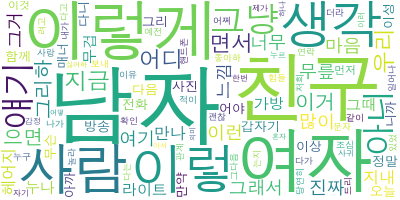

In [51]:
termList = textObj.vocab()

path = "/Libaray/Fonts/AppleGothic.ttf"
wc = WordCloud(font_path=path, max_words=100, background_color="white")
wc.generate_from_frequencies(termList)
wc.to_image()

In [36]:
wc.to_file("img/"+FILE_NAME+".png")

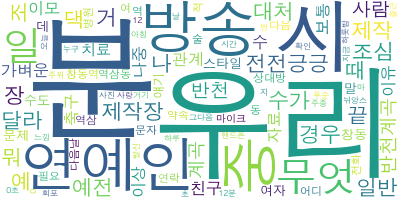

In [52]:
tagged = Kkma().nouns(corpus)
nounList = defaultdict(int)

for _ in tagged:
    nounList[_] += 1

wc.generate_from_frequencies(nounList)
wc.to_image()

### K-Means : Clustering

In [38]:
import warnings
warnings.filterwarnings('ignore')

In [39]:
# x : lexicon index  of documents words  (sparse matrix)
# index2word : global lexicon list
# word2index : word index => {'word': index}

In [40]:
# load collection to file
# collection = cleaned_collection
collection = []
file_name = "text/witch_hunt_2_online-audio-converter.com_16000.txt"
para_idx = 0
with open(file_name, 'r') as f:
    while True:
        line = f.readline()
        if not line: break
        collection.append(["paragraph"+str(para_idx), line])
        para_idx += 1

collection

[['paragraph0',
  '근데 연예인 중에 저도 함께 많이 방송을 뭘 하게 될 일이 생기면 전전긍긍하고 제작장 댁에서 좀 빼 달라 나는 같이 지금 할 수가 끝까지 그런 거 조심하는 경우가 있고 어떤 분들은 또 천연덕스럽게 조는 괜찮고 훌륭하게 대처하는 분들도 계시더라구요.\n'],
 ['paragraph1', '예.\n'],
 ['paragraph2', '어때요?\n'],
 ['paragraph3', '함께 방송에 나와요.\n'],
 ['paragraph4', '뭐 예전에 잠깐 이렇게 사겼던 그럼 일반 사람인데 갑자기 반천계곡 예.\n'],
 ['paragraph5', '예 많이 힘들죠.\n'],
 ['paragraph6', '그냥 조그만 맞는구나 해서 헤어진 가벼운 관계는 우리 이모 친구는 계속 지내자.\n'],
 ['paragraph7',
  '근데 정말 막 축구 못 살고 막 그러다가 어쩔 수 없는 이유로 헤어졌으면 나중에 만나서 친구 잘 지내는가?\n'],
 ['paragraph8', '이렇게 되는 거 이상한 거 아닌가요?\n'],
 ['paragraph9', '잘 지내는가?\n'],
 ['paragraph10', '좋아했던 사람 자료 왔는가 보통 치료가 잘 안 되는 거예요.\n'],
 ['paragraph11', '그냥 쉽게 쉽게 만나는 스타일이 수도 있을 거 같아요.\n'],
 ['paragraph12', '근데 문제는이 여자가 딴 거를 못 해.\n'],
 ['paragraph13', '그렇지.\n'],
 ['paragraph14',
  '이런데 사 준다는 거야이 말을 할 때 얼마나 많은게 맞는 얘기고 못 찾는 얘기하며 방송용으로 창동역 역삼동 헤어졌어요.\n'],
 ['paragraph15', '상대방에게 다시 연락 온 적 있어.\n'],
 ['paragraph16', '혹시 없어요?\n'],
 ['paragraph17', '미친 거 같아.\n'],
 ['paragraph18', '다음에 술 마시고 전화한 거야.\n'],
 ['paragra

In [41]:
paragraphs = [_[0] for _ in collection]
paragraphs

['paragraph0',
 'paragraph1',
 'paragraph2',
 'paragraph3',
 'paragraph4',
 'paragraph5',
 'paragraph6',
 'paragraph7',
 'paragraph8',
 'paragraph9',
 'paragraph10',
 'paragraph11',
 'paragraph12',
 'paragraph13',
 'paragraph14',
 'paragraph15',
 'paragraph16',
 'paragraph17',
 'paragraph18',
 'paragraph19',
 'paragraph20',
 'paragraph21',
 'paragraph22',
 'paragraph23',
 'paragraph24',
 'paragraph25',
 'paragraph26',
 'paragraph27',
 'paragraph28',
 'paragraph29',
 'paragraph30',
 'paragraph31',
 'paragraph32',
 'paragraph33',
 'paragraph34',
 'paragraph35',
 'paragraph36',
 'paragraph37',
 'paragraph38',
 'paragraph39',
 'paragraph40',
 'paragraph41',
 'paragraph42',
 'paragraph43',
 'paragraph44',
 'paragraph45',
 'paragraph46',
 'paragraph47',
 'paragraph48',
 'paragraph49',
 'paragraph50',
 'paragraph51',
 'paragraph52',
 'paragraph53',
 'paragraph54',
 'paragraph55',
 'paragraph56',
 'paragraph57',
 'paragraph58',
 'paragraph59',
 'paragraph60',
 'paragraph61',
 'paragraph62',
 '

In [42]:
lexicon = []

for para in collection:
    for token in word_tokenize(para[1].strip()):
        if token not in lexicon:
            lexicon.append(token)

# # for extended_collection
# for para in extended_collection:
#     for token in para[1]:
#         if token not in lexicon:
#             lexicon.append(token)

index2word = lexicon
print(len(lexicon))
print(lexicon)

761
['근데', '연예인', '중에', '저도', '함께', '많이', '방송을', '뭘', '하게', '될', '일이', '생기면', '전전긍긍하고', '제작장', '댁에서', '좀', '빼', '달라', '나는', '같이', '지금', '할', '수가', '끝까지', '그런', '거', '조심하는', '경우가', '있고', '어떤', '분들은', '또', '천연덕스럽게', '조는', '괜찮고', '훌륭하게', '대처하는', '분들도', '계시더라구요', '.', '예', '어때요', '?', '방송에', '나와요', '뭐', '예전에', '잠깐', '이렇게', '사겼던', '그럼', '일반', '사람인데', '갑자기', '반천계곡', '힘들죠', '그냥', '조그만', '맞는구나', '해서', '헤어진', '가벼운', '관계는', '우리', '이모', '친구는', '계속', '지내자', '정말', '막', '축구', '못', '살고', '그러다가', '어쩔', '수', '없는', '이유로', '헤어졌으면', '나중에', '만나서', '친구', '잘', '지내는가', '되는', '이상한', '아닌가요', '좋아했던', '사람', '자료', '왔는가', '보통', '치료가', '안', '거예요', '쉽게', '만나는', '스타일이', '수도', '있을', '같아요', '문제는이', '여자가', '딴', '거를', '해', '그렇지', '이런데', '사', '준다는', '거야이', '말을', '때', '얼마나', '많은게', '맞는', '얘기고', '찾는', '얘기하며', '방송용으로', '창동역', '역삼동', '헤어졌어요', '상대방에게', '다시', '연락', '온', '적', '있어', '혹시', '없어요', '미친', '같아', '다음에', '술', '마시고', '전화한', '거야', '그래서', '약속할', '말들을', '자꾸', '문자로', '보내는', '다음날', '되면', '필요하거든', '당연히', '병원에', '있어요', '받아', '본'

In [43]:
word2index = {}
for token in sorted(lexicon):
    word2index[token] = lexicon.index(token)

word2index

{',': 166,
 '-': 572,
 '.': 39,
 '0초': 190,
 '12분': 191,
 '2만': 576,
 '7': 643,
 '9시': 290,
 '?': 42,
 'TV': 731,
 '가는데': 373,
 '가다가': 690,
 '가만히': 535,
 '가면서': 427,
 '가방': 590,
 '가벼운': 61,
 '가서': 395,
 '가슴살': 460,
 '가장': 494,
 '가지고': 689,
 '간단한': 495,
 '갈게': 292,
 '감정도': 350,
 '감정이': 654,
 '갑자기': 53,
 '갔는데': 528,
 '갔을때': 730,
 '같다는': 375,
 '같아': 132,
 '같아요': 100,
 '같은': 541,
 '같은데': 457,
 '같이': 19,
 '거': 25,
 '거거든요': 542,
 '거기가': 220,
 '거는': 555,
 '거니': 435,
 '거를': 104,
 '거면': 584,
 '거야': 137,
 '거야이': 110,
 '거였지': 218,
 '거예요': 94,
 '거절하는': 357,
 '거칠어지는': 242,
 '걱정해주는': 232,
 '건': 418,
 '건데': 447,
 '건지': 630,
 '걸': 617,
 '걸어': 619,
 '겁니다': 550,
 '것': 262,
 '것처럼': 710,
 '경우가': 27,
 '경우도': 683,
 '경험이': 569,
 '계속': 66,
 '계시더라구요': 38,
 '고마워': 684,
 '고운데': 580,
 '고장': 600,
 '고통의': 724,
 '곤경에': 750,
 '공룡에서': 752,
 '관계': 295,
 '관계는': 62,
 '관심이': 560,
 '관심있는여자': 604,
 '관한': 706,
 '괜찮고': 34,
 '괜찮을': 742,
 '구워': 400,
 '굳이': 275,
 '귀엽게': 455,
 '그': 211,
 '그거': 468,
 '그거는': 293,
 '그거를': 274,
 '그냥'

In [44]:
dtm = np.zeros((len(paragraphs), len(index2word)))

for d_idx, para in enumerate(collection):
    for token in word_tokenize(para[1].strip()):
        if token in lexicon:
            dtm[d_idx][lexicon.index(token)] = 1
            
x = scipy.sparse.csr_matrix(np.array(dtm))
x

<147x761 sparse matrix of type '<class 'numpy.float64'>'
	with 1314 stored elements in Compressed Sparse Row format>

In [45]:
# train spherical k-means model

from soyclustering import SphericalKMeans
from sklearn.preprocessing import normalize

kmeans = SphericalKMeans(
    n_clusters = 50,
    init = 'similar_cut',
    verbose = True
)

x = normalize(x, norm='l2')
labels = kmeans.fit_predict(x)

initialization_time=0.037216 sec, sparsity=0.0113
n_iter=1, changed=142, inertia=64.419, iter_time=0.004 sec, sparsity=0.0295
n_iter=2, changed=0, inertia=44.556, iter_time=0.003 sec, sparsity=0.0295
Early converged.


In [46]:
# cluster labeling

from soyclustering import proportion_keywords

centers = kmeans.cluster_centers_
keywords = proportion_keywords(
    centers,
    labels,
    index2word = index2word
)

In [47]:
centers.shape

(50, 761)

In [48]:
from collections import Counter

cluster_size = Counter(labels)
selected_clusters = {
    idx for idx in range(centers.shape[0])
#     if 50 <= cluster_size.get(idx) <= 100
}

print('number of selected clusters = {}'.format(len(selected_clusters)))

number of selected clusters = 50


In [49]:
# save result
# SAVE_RESULT = True
# if SAVE_RESULT:
#     with open('./2016-10-20-news-kmeans500.pkl', 'wb') as f:
#         params = {
#             'centers': centers,
#             'labels': labels,
#             'index2word': index2word
#         }
#         pickle.dump(params, f)

In [50]:
topk = 3

def pretty_label_print(labels, words_in_a_line=10):
    for i, word in enumerate(labels):
        print('{}, '.format(word), end='')
        if (i + 1) % words_in_a_line == 0:
            print()
    print()

for cluster_idx in list(selected_clusters)[:topk]:
    cluster_labels = [
        word for word, score in sorted(
            keywords[cluster_idx], key=lambda x:-x[1])[:topk]
    ]

    print('\n# cluster = {}'.format(cluster_idx))
    pretty_label_print(cluster_labels)


# cluster = 0
아, 그럼요, 보도록, 

# cluster = 1
혹시, 없어요, ?, 

# cluster = 2
가장, 간단한, 이유, 
